<a href="https://colab.research.google.com/github/EfrainAlvarez661/ProyectoDiabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/akshaydattatraykhare/diabetes-dataset/versions/1


In [ ]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

# Load the dataframe
df = pd.read_csv(path+'/diabetes.csv')
df.head()



Path to dataset files: /root/.cache/kagglehub/datasets/akshaydattatraykhare/diabetes-dataset/versions/1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Busca los nulos
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#analizar el df
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


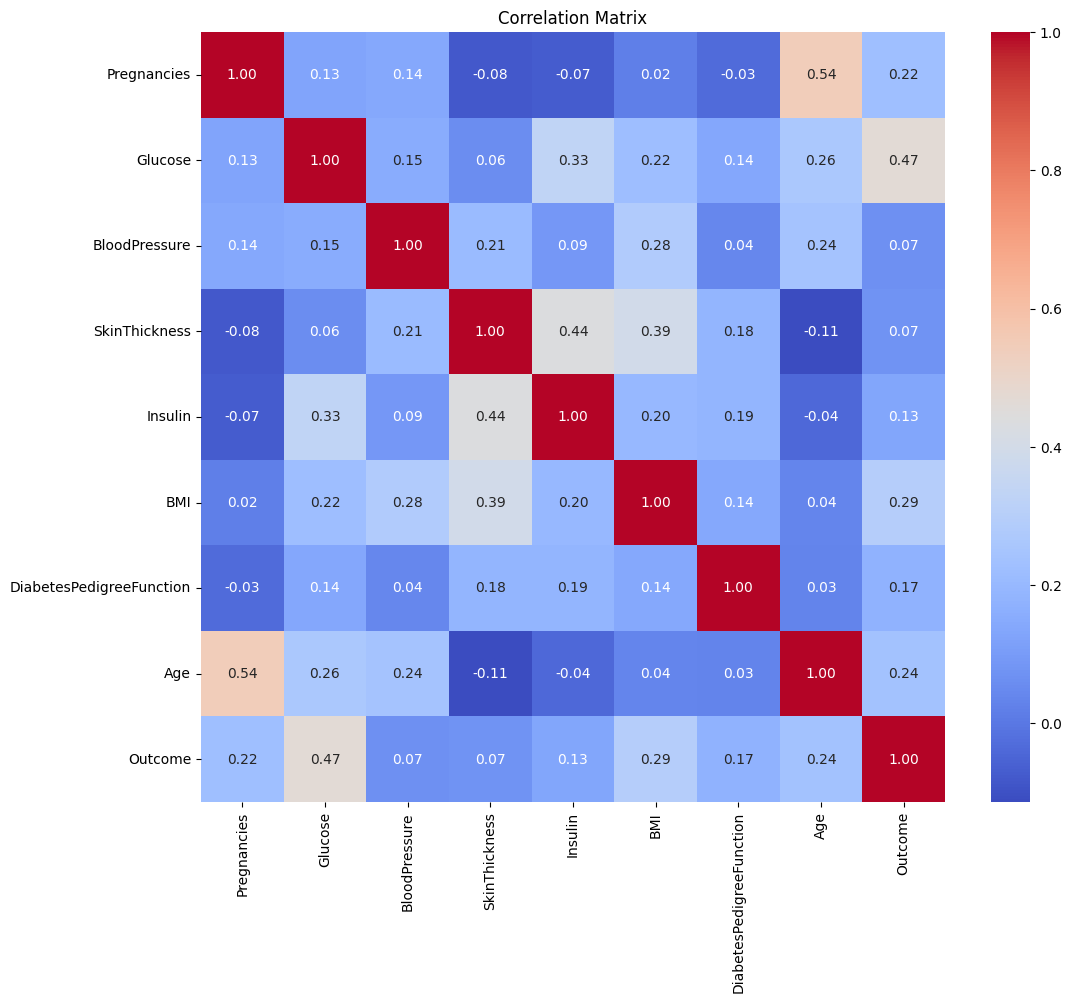

In [ ]:
# prompt: muestrame la correlacion entre variables

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# prompt: dime la cantidad de outliers de cada feature

# Function to identify outliers using IQR
def find_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
  return outliers

# Iterate through each feature and find the outliers
for feature in df.columns:
  outliers = find_outliers_iqr(df[feature])
  print(f"Number of outliers in {feature}: {len(outliers)}")


Number of outliers in Pregnancies: 4
Number of outliers in Glucose: 5
Number of outliers in BloodPressure: 45
Number of outliers in SkinThickness: 1
Number of outliers in Insulin: 34
Number of outliers in BMI: 19
Number of outliers in DiabetesPedigreeFunction: 29
Number of outliers in Age: 9
Number of outliers in Outcome: 0


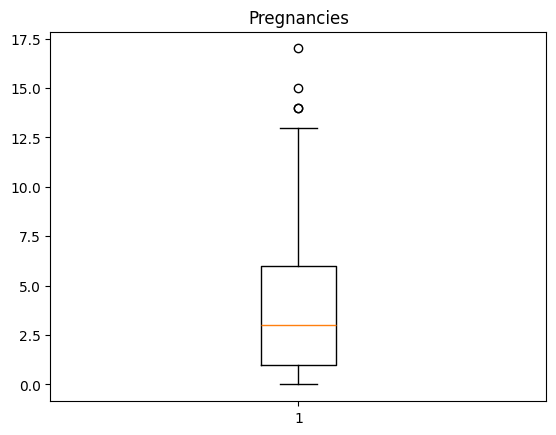

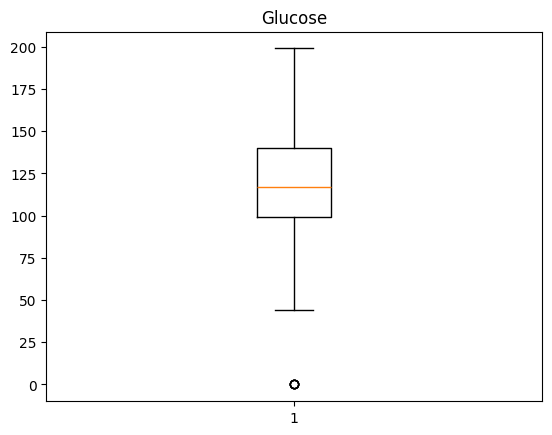

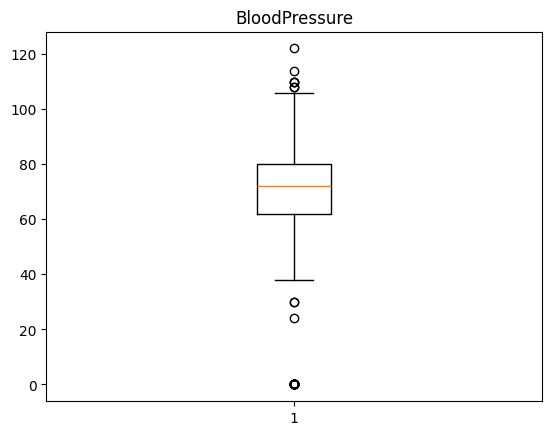

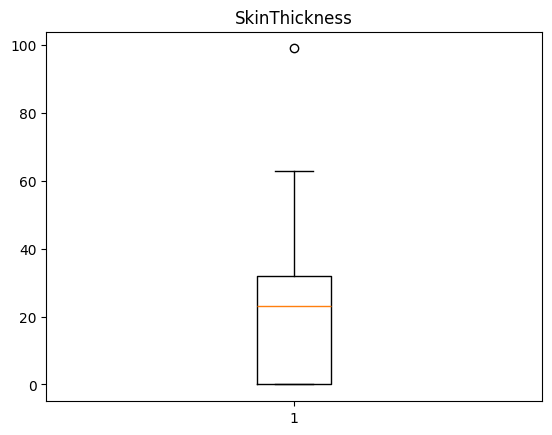

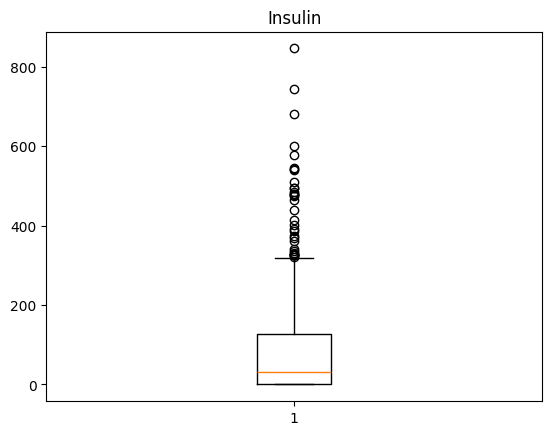

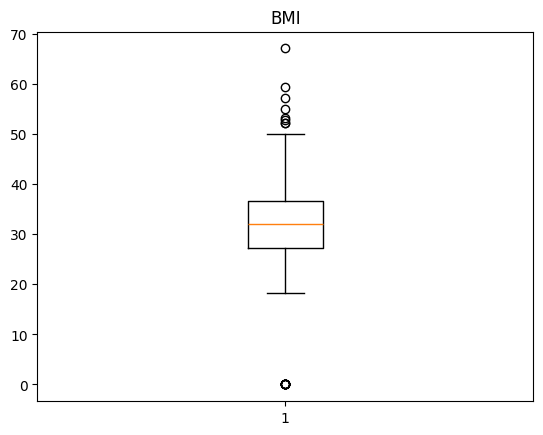

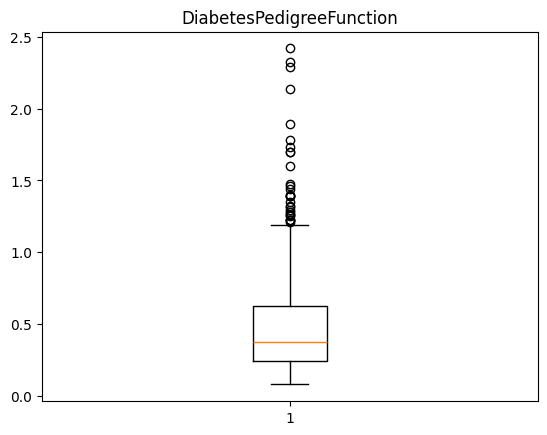

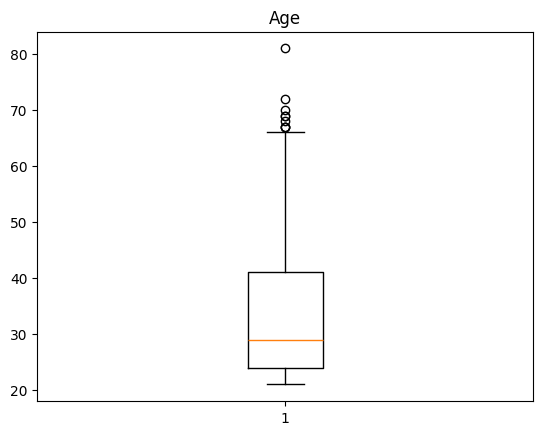

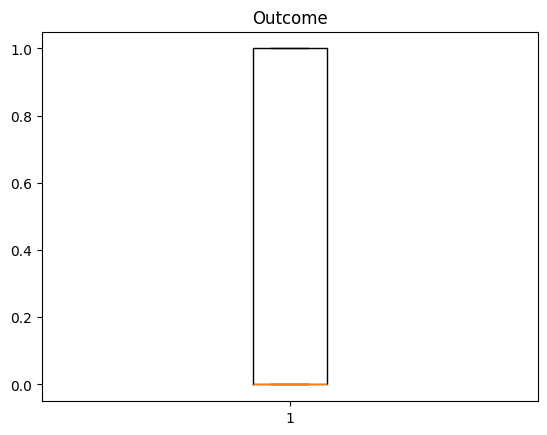

In [ ]:
#Buscar los outliers de cada feature
import matplotlib.pyplot as plt

# Crear un boxplot para cada columna
for column in df.columns:
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()

<ipython-input-201-a8db6ca5b7c9>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column] < lower_whisker, column] = lower_whisker
<ipython-input-201-a8db6ca5b7c9>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '37.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column] < lower_whisker, column] = lower_whisker
<ipython-input-201-a8db6ca5b7c9>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-190.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column] < lower_whisker, column] = lower_whisker
<ipython-input-201-a8db6ca5b7c9>:1

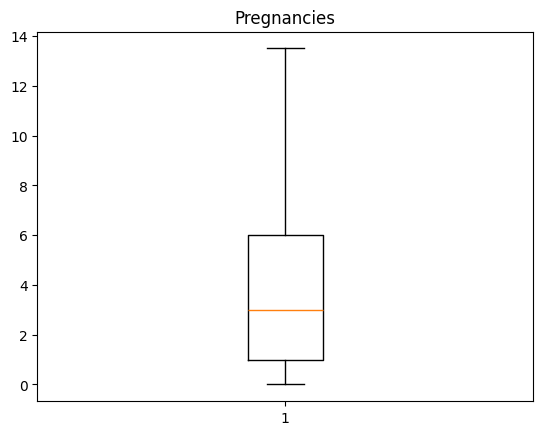

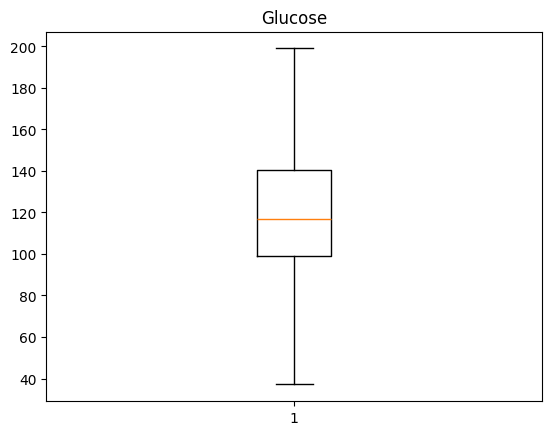

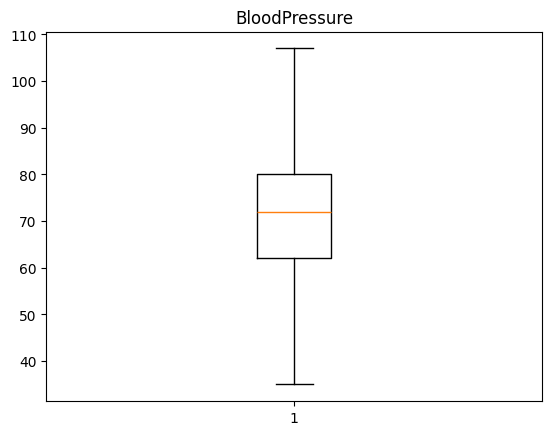

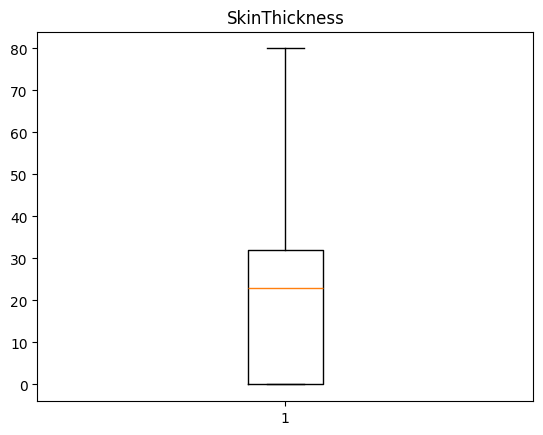

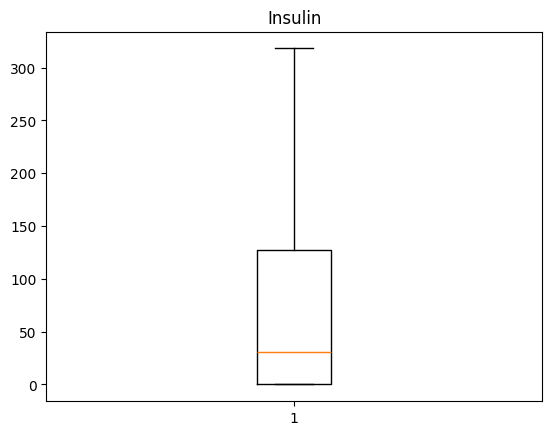

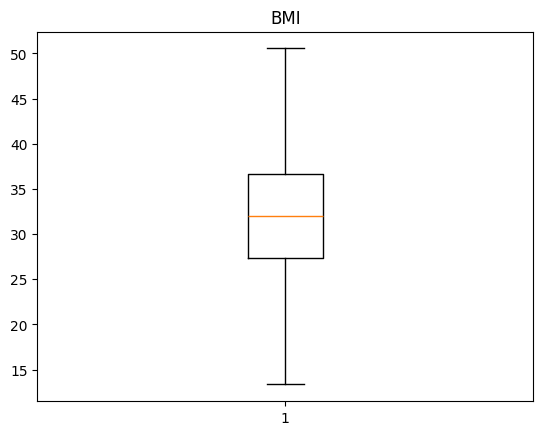

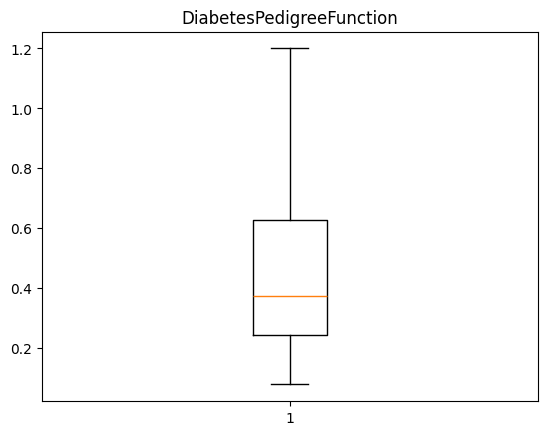

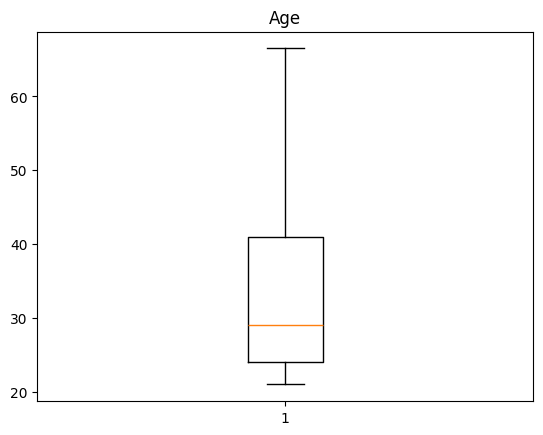

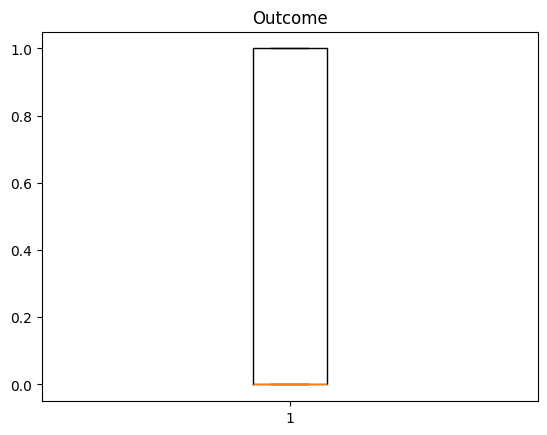

In [ ]:
# prompt: transformas los outlieres al valor del bigote mayor y menor respectivamente

def transform_outliers_iqr(df, column):
  """
  Transforms outliers to the maximum and minimum whisker values using IQR method.

  Args:
      df: DataFrame.
      column: The column name.
  """
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1 - 1.5 * IQR
  upper_whisker = Q3 + 1.5 * IQR

  df.loc[df[column] < lower_whisker, column] = lower_whisker
  df.loc[df[column] > upper_whisker, column] = upper_whisker

# Apply the transformation to each column
for column in df.columns:
  transform_outliers_iqr(df, column)


# Crear un boxplot para cada columna
for column in df.columns:
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


In [ ]:
# prompt: normaliza las features copn minmax scaler y guardalo con joblib

from sklearn.preprocessing import MinMaxScaler
import joblib

# Selecciona las columnas numéricas que quieres normalizar
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']

# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajusta y transforma los datos numéricos
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Guarda el scaler con joblib
joblib.dump(scaler, 'scaler.joblib')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.444444,0.684942,0.513889,0.4375,0.000000,0.544355,0.489305,0.637363,1.0
1,0.074074,0.295753,0.430556,0.3625,0.000000,0.356183,0.243316,0.219780,0.0
2,0.592593,0.901158,0.402778,0.0000,0.000000,0.267473,0.529412,0.241758,1.0
3,0.074074,0.320463,0.430556,0.2875,0.295481,0.396505,0.079323,0.000000,0.0
4,0.000000,0.616988,0.069444,0.4375,0.528094,0.799731,1.000000,0.263736,1.0


In [ ]:
#Entrena X y Y
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.444444,0.684942,0.513889,0.4375,0.000000,0.544355,0.489305,0.637363
1,0.074074,0.295753,0.430556,0.3625,0.000000,0.356183,0.243316,0.219780
2,0.592593,0.901158,0.402778,0.0000,0.000000,0.267473,0.529412,0.241758
3,0.074074,0.320463,0.430556,0.2875,0.295481,0.396505,0.079323,0.000000
4,0.000000,0.616988,0.069444,0.4375,0.528094,0.799731,1.000000,0.263736
...,...,...,...,...,...,...,...,...
763,0.740741,0.394595,0.569444,0.6000,0.565815,0.525538,0.082888,0.923077
764,0.148148,0.524324,0.486111,0.3375,0.000000,0.630376,0.233512,0.131868
765,0.370370,0.518147,0.513889,0.2875,0.352063,0.345430,0.148841,0.197802
766,0.074074,0.549035,0.347222,0.0000,0.000000,0.450269,0.241533,0.571429


In [ ]:
# prompt: entrena X y y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


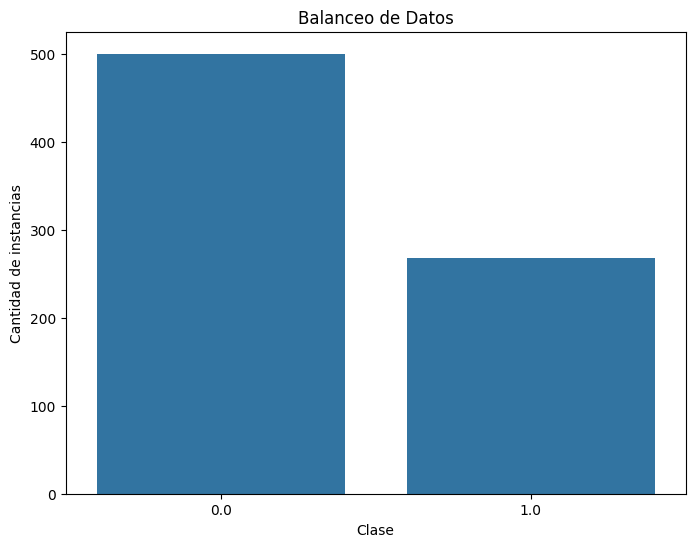

Outcome
0.0    0.651042
1.0    0.348958
Name: count, dtype: float64


In [ ]:
# prompt: muetsrame grafico el bal;anceo de datos

import matplotlib.pyplot as plt
# Contar la cantidad de instancias en cada clase
class_counts = df['Outcome'].value_counts()

# Crear un gráfico de barras para visualizar el balanceo de datos
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Balanceo de Datos')
plt.xlabel('Clase')
plt.ylabel('Cantidad de instancias')
plt.show()

# Mostrar la proporción de cada clase
print(class_counts / len(df))


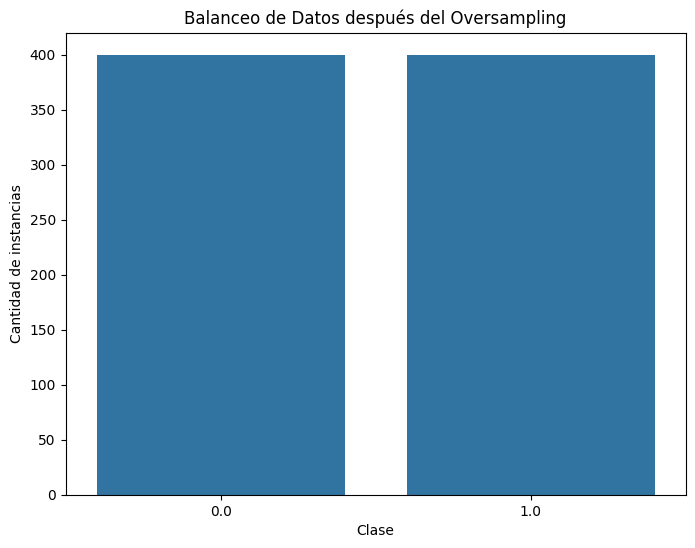

Outcome
0.0    0.5
1.0    0.5
Name: count, dtype: float64


In [ ]:
# prompt: balncea los datos con oversampling

import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

# Crea un objeto RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Ajusta y transforma los datos de entrenamiento
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Contar la cantidad de instancias en cada clase después del oversampling
class_counts_resampled = pd.Series(y_resampled).value_counts()

# Crear un gráfico de barras para visualizar el balanceo de datos después del oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Balanceo de Datos después del Oversampling')
plt.xlabel('Clase')
plt.ylabel('Cantidad de instancias')
plt.show()

# Mostrar la proporción de cada clase después del oversampling
print(class_counts_resampled / len(y_resampled))


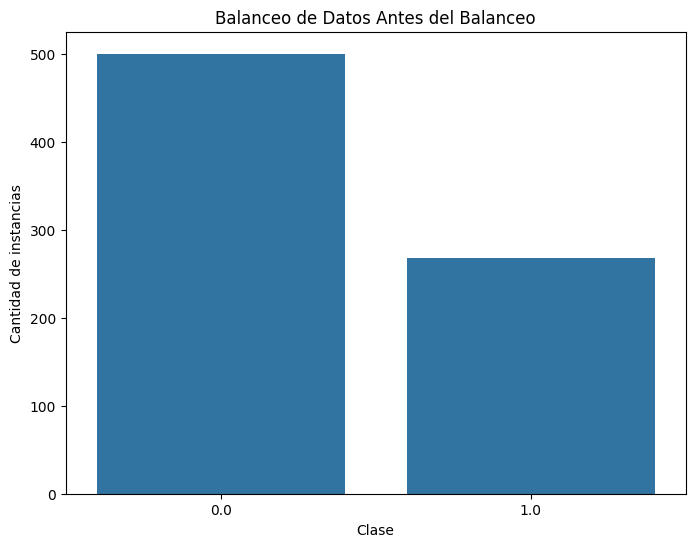

Proporción de clases antes del balanceo:
Outcome
0.0    0.651042
1.0    0.348958
Name: count, dtype: float64


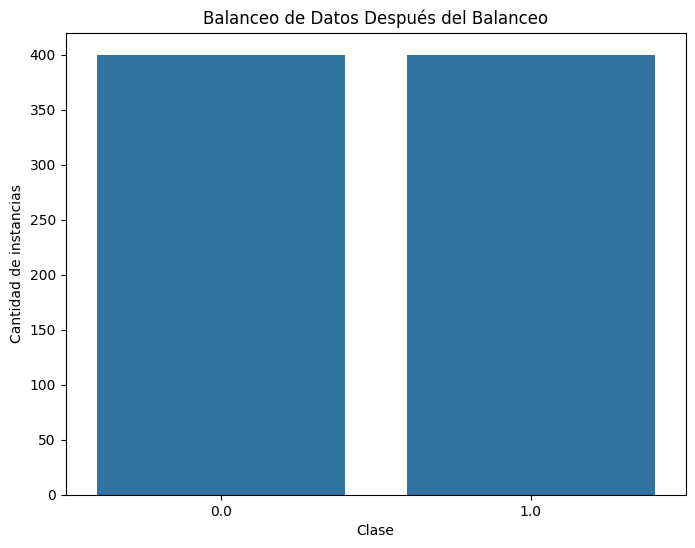

Proporción de clases después del balanceo:
Outcome
0.0    0.5
1.0    0.5
Name: count, dtype: float64


In [ ]:
# prompt: muestrame el grafico de datos antes y despues de balancear

import pandas as pd
import matplotlib.pyplot as plt
# Contar la cantidad de instancias en cada clase antes del balanceo
class_counts_before = df['Outcome'].value_counts()

# Crear un gráfico de barras para visualizar el balanceo de datos antes del balanceo
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Balanceo de Datos Antes del Balanceo')
plt.xlabel('Clase')
plt.ylabel('Cantidad de instancias')
plt.show()

# Mostrar la proporción de cada clase antes del balanceo
print("Proporción de clases antes del balanceo:")
print(class_counts_before / len(df))

# Contar la cantidad de instancias en cada clase después del balanceo
class_counts_after = pd.Series(y_resampled).value_counts()

# Crear un gráfico de barras para visualizar el balanceo de datos después del balanceo
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Balanceo de Datos Después del Balanceo')
plt.xlabel('Clase')
plt.ylabel('Cantidad de instancias')
plt.show()

# Mostrar la proporción de cada clase después del balanceo
print("Proporción de clases después del balanceo:")
print(class_counts_after / len(y_resampled))


Precisión del modelo sin balancear: 0.6948051948051948


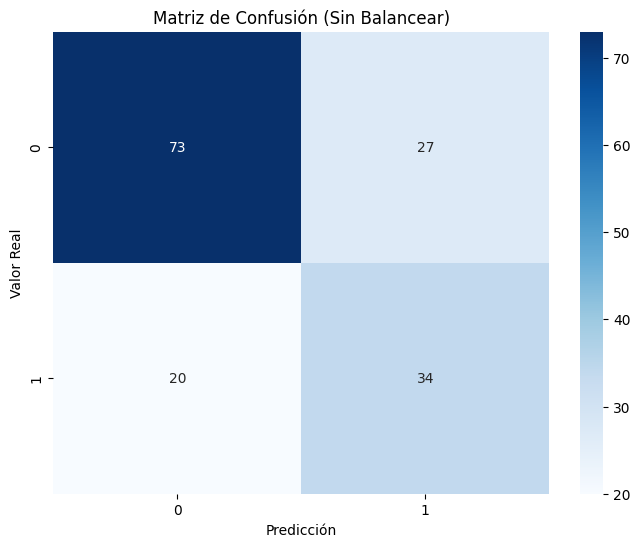

Precisión del modelo balanceado: 0.71875


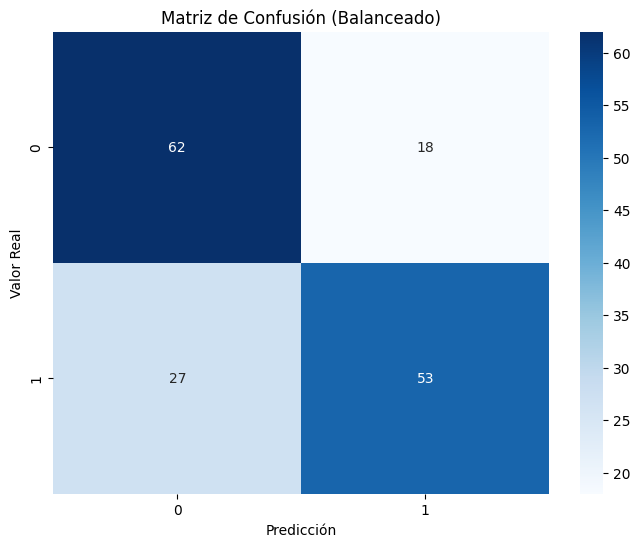

In [ ]:
# prompt: entrena el modelo con gaussian nb con datos balanceado y sin balancear muestrame el accuracy y genera grafico  matriz de confusion

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear y entrenar el modelo Gaussian NB con datos sin balancear
gnb_unbalanced = GaussianNB()
gnb_unbalanced.fit(X_train, y_train)

# Realizar predicciones con el modelo sin balancear
y_pred_unbalanced = gnb_unbalanced.predict(X_test)

# Calcular la precisión del modelo sin balancear
accuracy_unbalanced = accuracy_score(y_test, y_pred_unbalanced)
print("Precisión del modelo sin balancear:", accuracy_unbalanced)

# Generar la matriz de confusión para el modelo sin balancear
cm_unbalanced = confusion_matrix(y_test, y_pred_unbalanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_unbalanced, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión (Sin Balancear)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


# Crear y entrenar el modelo Gaussian NB con datos balanceados (X_resampled, y_resampled)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

gnb_balanced = GaussianNB()
gnb_balanced.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones con el modelo balanceado
y_pred_balanced = gnb_balanced.predict(X_test_resampled)

# Calcular la precisión del modelo balanceado
accuracy_balanced = accuracy_score(y_test_resampled, y_pred_balanced)
print("Precisión del modelo balanceado:", accuracy_balanced)

# Generar la matriz de confusión para el modelo balanceado
cm_balanced = confusion_matrix(y_test_resampled, y_pred_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_balanced, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión (Balanceado)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


Precisión del modelo MultinomialNB sin balancear: 0.6493506493506493


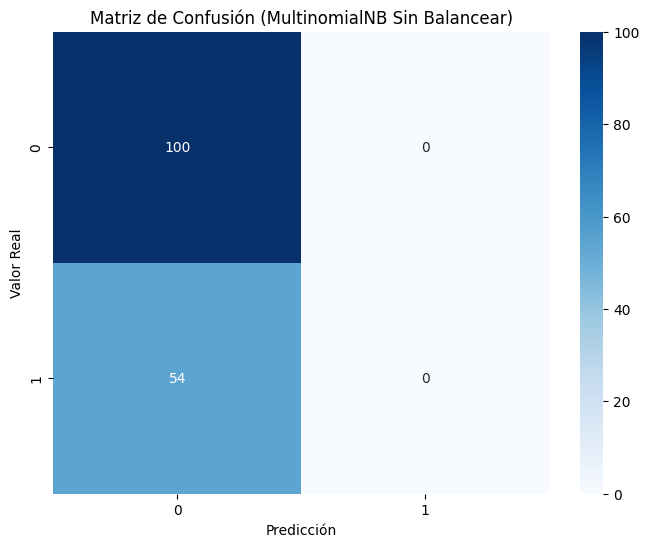

Precisión del modelo MultinomialNB balanceado: 0.65625


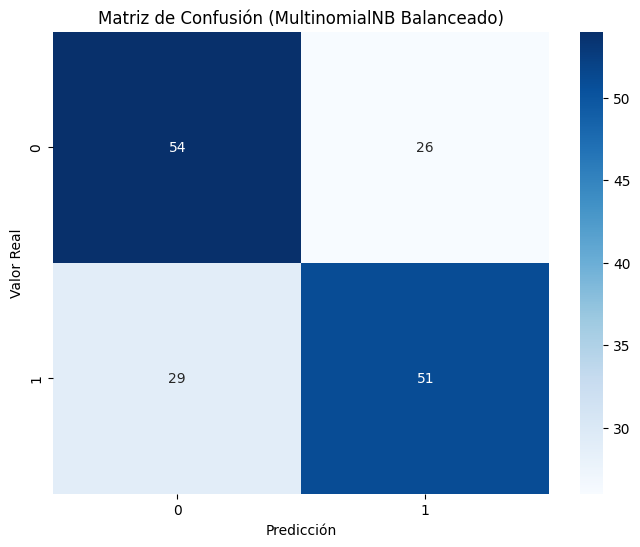

In [ ]:
# prompt: entrena el modelo con multinomialnb con datos balanceado y sin balancear muestrame el accuracy y genera grafico  matriz de confusion

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear y entrenar el modelo MultinomialNB con datos sin balancear
mnb_unbalanced = MultinomialNB()
mnb_unbalanced.fit(X_train, y_train)

# Realizar predicciones con el modelo sin balancear
y_pred_unbalanced = mnb_unbalanced.predict(X_test)

# Calcular la precisión del modelo sin balancear
accuracy_unbalanced = accuracy_score(y_test, y_pred_unbalanced)
print("Precisión del modelo MultinomialNB sin balancear:", accuracy_unbalanced)

# Generar la matriz de confusión para el modelo sin balancear
cm_unbalanced = confusion_matrix(y_test, y_pred_unbalanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_unbalanced, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión (MultinomialNB Sin Balancear)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


# Crear y entrenar el modelo MultinomialNB con datos balanceados (X_resampled, y_resampled)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

mnb_balanced = MultinomialNB()
mnb_balanced.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones con el modelo balanceado
y_pred_balanced = mnb_balanced.predict(X_test_resampled)

# Calcular la precisión del modelo balanceado
accuracy_balanced = accuracy_score(y_test_resampled, y_pred_balanced)
print("Precisión del modelo MultinomialNB balanceado:", accuracy_balanced)

# Generar la matriz de confusión para el modelo balanceado
cm_balanced = confusion_matrix(y_test_resampled, y_pred_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_balanced, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión (MultinomialNB Balanceado)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


Precisión del modelo BernoulliNB sin balancear: 0.6428571428571429


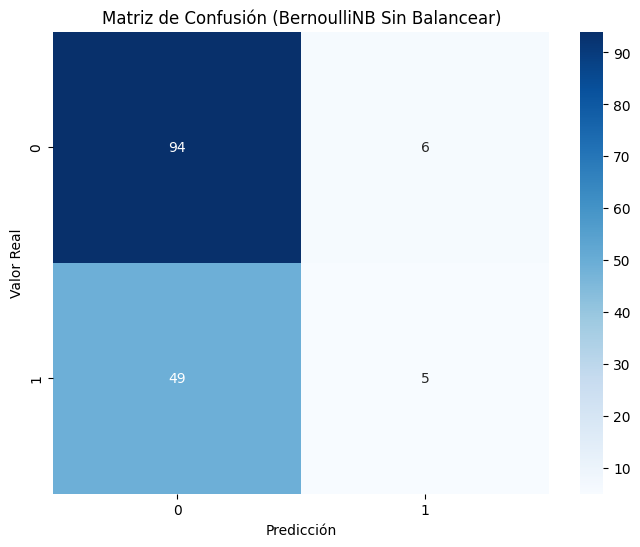

Precisión del modelo BernoulliNB balanceado: 0.54375


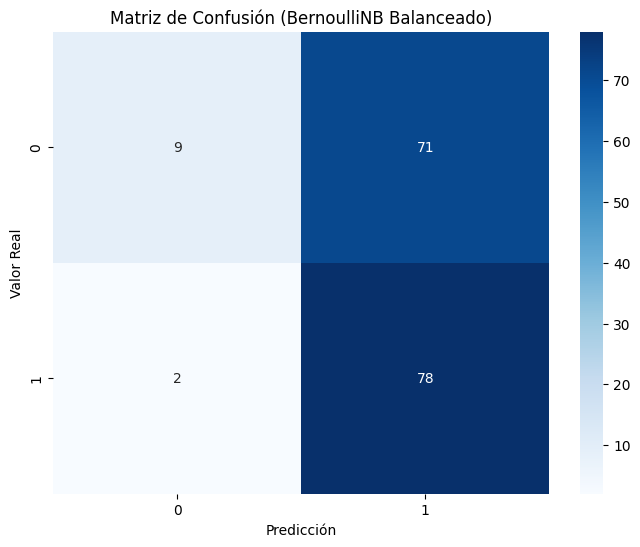

In [ ]:
# prompt: entrena el modelo con bernuli con datos balanceado y sin balancear muestrame el accuracy y genera grafico  matriz de confusion

import matplotlib.pyplot as plt
# Crear y entrenar el modelo BernoulliNB con datos sin balancear
from sklearn.naive_bayes import BernoulliNB
bnb_unbalanced = BernoulliNB()
bnb_unbalanced.fit(X_train, y_train)

# Realizar predicciones con el modelo sin balancear
y_pred_unbalanced = bnb_unbalanced.predict(X_test)

# Calcular la precisión del modelo sin balancear
accuracy_unbalanced = accuracy_score(y_test, y_pred_unbalanced)
print("Precisión del modelo BernoulliNB sin balancear:", accuracy_unbalanced)

# Generar la matriz de confusión para el modelo sin balancear
cm_unbalanced = confusion_matrix(y_test, y_pred_unbalanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_unbalanced, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión (BernoulliNB Sin Balancear)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


# Crear y entrenar el modelo BernoulliNB con datos balanceados (X_resampled, y_resampled)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

bnb_balanced = BernoulliNB()
bnb_balanced.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones con el modelo balanceado
y_pred_balanced = bnb_balanced.predict(X_test_resampled)

# Calcular la precisión del modelo balanceado
accuracy_balanced = accuracy_score(y_test_resampled, y_pred_balanced)
print("Precisión del modelo BernoulliNB balanceado:", accuracy_balanced)

# Generar la matriz de confusión para el modelo balanceado
cm_balanced = confusion_matrix(y_test_resampled, y_pred_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_balanced, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión (BernoulliNB Balanceado)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


Accuracy (Unbalanced): 0.7532467532467533


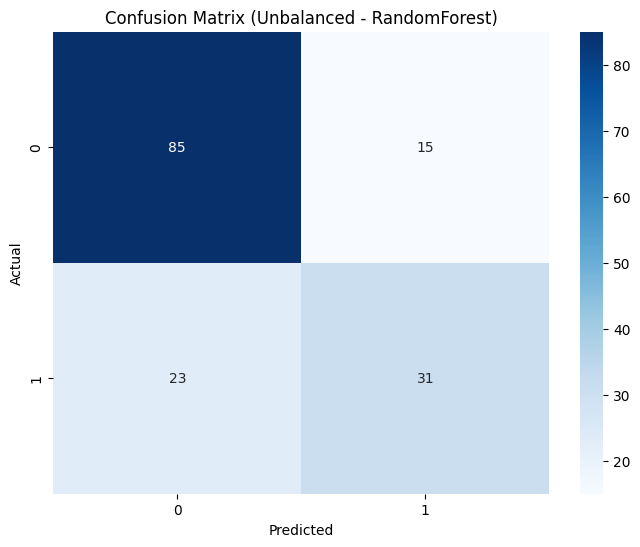

Accuracy (Balanced): 0.89375


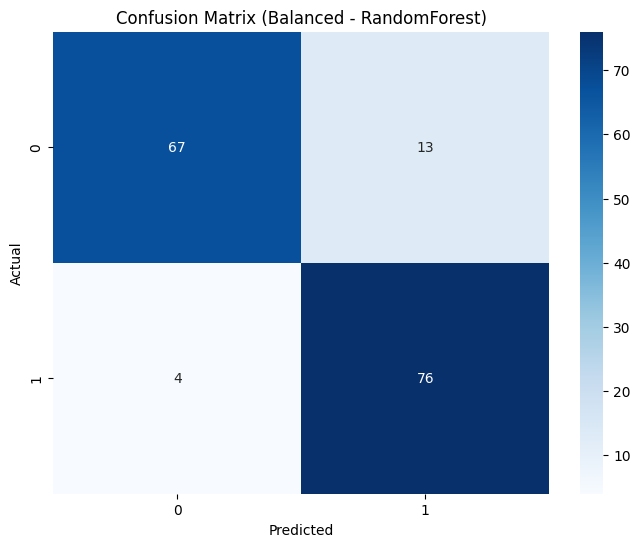

In [ ]:
# prompt: entrena el modelo con randomforestclassifier con datos balanceado y sin balancear muestrame el accuracy y genera grafico  matriz de confusion

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code for data loading, preprocessing, and balancing) ...

# Train RandomForestClassifier with unbalanced data
rf_unbalanced = RandomForestClassifier(random_state=42)
rf_unbalanced.fit(X_train, y_train)

# Predict with unbalanced model
y_pred_unbalanced = rf_unbalanced.predict(X_test)

# Calculate accuracy for unbalanced model
accuracy_unbalanced = accuracy_score(y_test, y_pred_unbalanced)
print("Accuracy (Unbalanced):", accuracy_unbalanced)

# Generate confusion matrix for unbalanced model
cm_unbalanced = confusion_matrix(y_test, y_pred_unbalanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_unbalanced, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Unbalanced - RandomForest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Train RandomForestClassifier with balanced data
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_train_resampled, y_train_resampled)

# Predict with balanced model
y_pred_balanced = rf_balanced.predict(X_test_resampled)

# Calculate accuracy for balanced model
accuracy_balanced = accuracy_score(y_test_resampled, y_pred_balanced)
print("Accuracy (Balanced):", accuracy_balanced)

# Generate confusion matrix for balanced model
cm_balanced = confusion_matrix(y_test_resampled, y_pred_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_balanced, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Balanced - RandomForest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Best parameters found: {'C': 4.3, 'kernel': 'rbf'}
Best accuracy found: 0.771875
Accuracy with best parameters: 0.78125


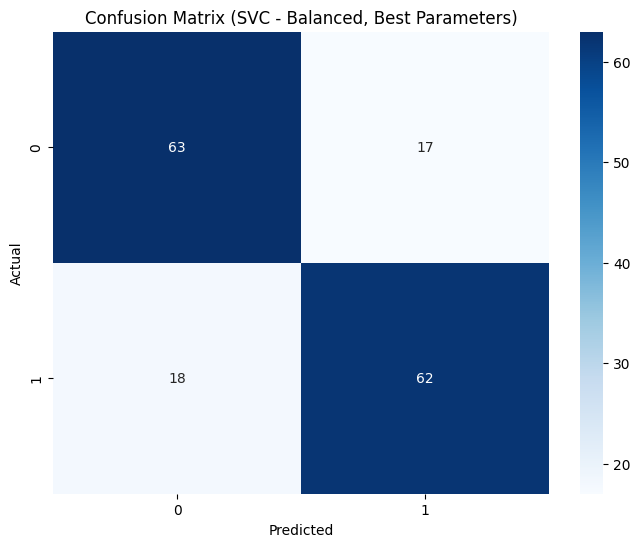

In [ ]:
# prompt: entrena el modelo con svc con datos balanceado  muestrame el accuracy y genera grafico  matriz de confusion   genera un grid search usando  {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ y con cada unos ve cambiando C de 0,1 en 0,1 hasta 5 y dame le mejor accuracy

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# ... (Your existing code for data loading, preprocessing, and balancing) ...

# Train SVC with balanced data
# Define the parameter grid for GridSearchCV
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1 * i for i in range(1, 51)]  # C values from 0.1 to 5
}

svc_model = SVC()
grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)


# Print the best parameters and accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best accuracy found:", grid_search.best_score_)

# Train the model with the best parameters
best_svc_model = SVC(**grid_search.best_params_)
best_svc_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_best = best_svc_model.predict(X_test_resampled)

# Calculate accuracy
accuracy_best = accuracy_score(y_test_resampled, y_pred_best)
print("Accuracy with best parameters:", accuracy_best)

# Generate confusion matrix
cm_best = confusion_matrix(y_test_resampled, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (SVC - Balanced, Best Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy (Balanced - KNN with 5 neighbors): 0.775


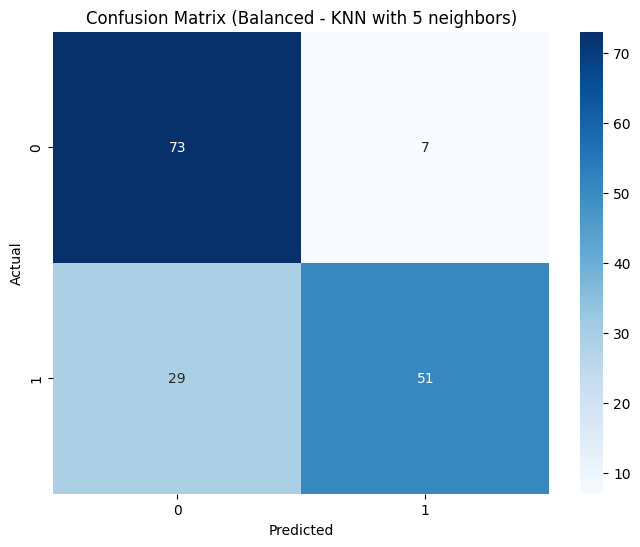

In [ ]:


import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# ... (Your existing code for data loading, preprocessing, and balancing) ...

# Train KNeighborsClassifier with balanced data and 5 neighbors
knn_balanced = KNeighborsClassifier(n_neighbors=5)
knn_balanced.fit(X_train, y_train)

# Predict with balanced model
y_pred_balanced = knn_balanced.predict(X_test_resampled)

# Calculate accuracy for balanced model
accuracy_balanced = accuracy_score(y_test_resampled, y_pred_balanced)
print("Accuracy (Balanced - KNN with 5 neighbors):", accuracy_balanced)

# Generate confusion matrix for balanced model
cm_balanced = confusion_matrix(y_test_resampled, y_pred_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_balanced, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Balanced - KNN with 5 neighbors)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy (Balanced): 0.89375


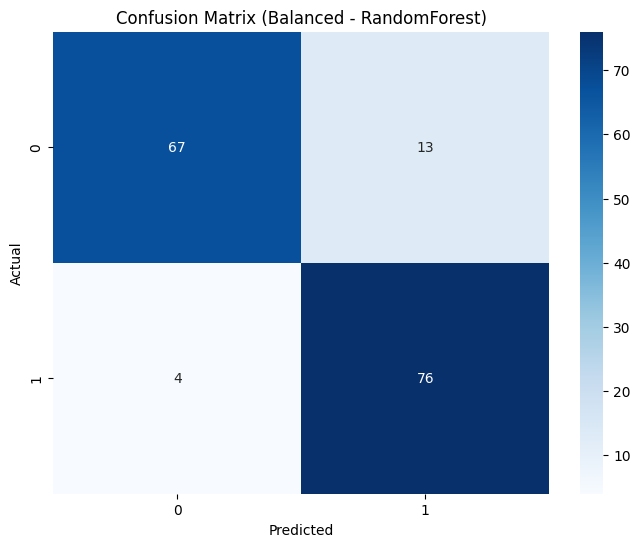

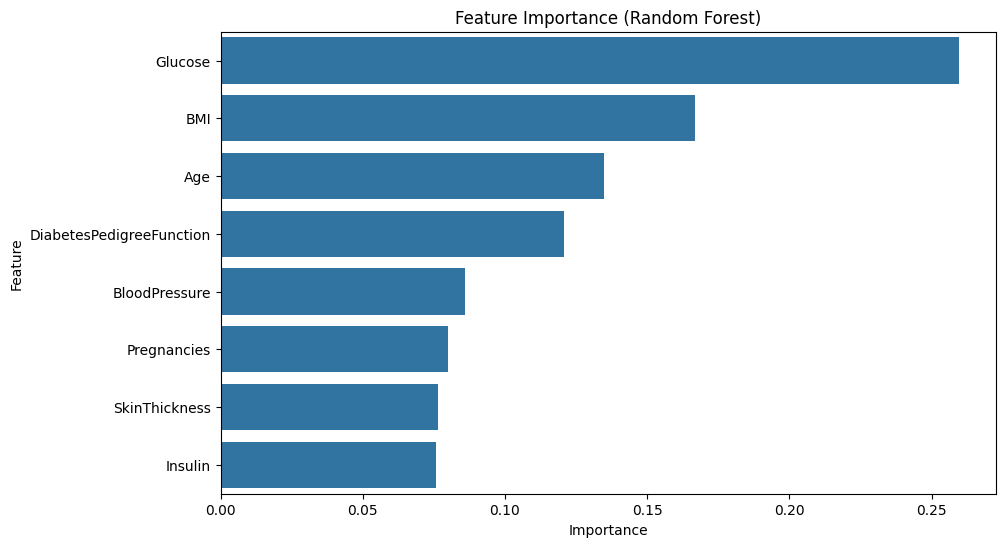

['modelo.joblib']

In [ ]:
# prompt: guarda el modelo random forest y muestra la importancia de las features en grafica y el accuracyy y la grafica de confuision

import pandas as pd
import matplotlib.pyplot as plt
# ... (Your existing code for data loading, preprocessing, and balancing) ...

# Train RandomForestClassifier with balanced data
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_train_resampled, y_train_resampled)



# Predict with balanced model
y_pred_balanced = rf_balanced.predict(X_test_resampled)

# Calculate accuracy for balanced model
accuracy_balanced = accuracy_score(y_test_resampled, y_pred_balanced)
print("Accuracy (Balanced):", accuracy_balanced)

# Generate confusion matrix for balanced model
cm_balanced = confusion_matrix(y_test_resampled, y_pred_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_balanced, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Balanced - RandomForest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
feature_importances = rf_balanced.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
joblib.dump(rf_balanced, 'modelo.joblib')
